In [1]:
# conda install -c conda-forge catboost

# Data Checking

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [3]:
# Data Checking
df = pd.read_csv('heart_disease_health_indicators.csv')

print("Number of columns: ", len(df.columns)) 
print("Number of columns: ", len(df))
print("Columns name: ", df.columns)
df.head()

Number of columns:  22
Number of columns:  253661
Columns name:  Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
# Sample data part 1
df.iloc[:5, :11]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies
0,0,1,1,1,40,1,0,0,0,0,1
1,0,0,0,0,25,1,0,0,1,0,0
2,0,1,1,1,28,0,0,0,0,1,0
3,0,1,0,1,27,0,0,0,1,1,1
4,0,1,1,1,24,0,0,0,1,1,1


In [5]:
# Sample data part 2
df.iloc[:5, 11:]

,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,5,18,15,1,0,9,4,3
1,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,5,30,30,1,0,9,4,8
3,0,1,0,2,0,0,0,0,11,3,6
4,0,1,0,2,3,0,0,0,11,5,4


In [6]:
# Checking data types & missing values

print(df.info())

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
# df.describe()
df.iloc[:,:11].describe()[1:]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies
mean,0.094173,0.428990,0.424113,0.962667,28.382475,0.443186,0.040570,0.296904,0.756577,0.634264,0.811437
std,0.292070,0.494933,0.494209,0.189578,6.608638,0.496763,0.197292,0.698147,0.429149,0.481637,0.391162
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [8]:
df.iloc[:,11:].describe()[1:]

,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
mean,0.056201,0.951049,0.084164,2.511379,3.184778,4.242028,0.168221,0.440348,8.032197,5.050461,6.054052
std,0.230310,0.215766,0.277633,1.068472,7.412822,8.717905,0.374063,0.496430,3.054203,0.985718,2.071036
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
# Labels / DV

for i in df.columns:
    # print(i, df[i].unique())
    print(df.groupby([i]).agg({"Income": pd.Series.count, "HeartDiseaseorAttack": pd.Series.sum}))

                      Income  HeartDiseaseorAttack
HeartDiseaseorAttack                              
0                     229773                     0
1                      23888                 23888
        Income  HeartDiseaseorAttack
HighBP                              
0       144843                  5964
1       108818                 17924
          Income  HeartDiseaseorAttack
HighChol                              
0         146080                  7139
1         107581                 16749
           Income  HeartDiseaseorAttack
CholCheck                              
0            9470                   271
1          244191                 23617
     Income  HeartDiseaseorAttack
BMI                              
12        6                     1
13       21                     1
14       41                     8
15      132                    17
16      347                    52
..      ...                   ...
91        1                     0
92       32               

<AxesSubplot:title={'center':'HighBP'}, ylabel='Frequency'>

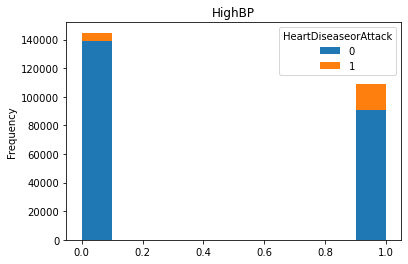

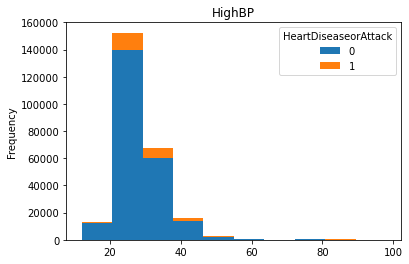

In [10]:
df.pivot(columns="HeartDiseaseorAttack")['HighBP'].plot(kind="hist", stacked=True, title='HighBP')
df.pivot(columns="HeartDiseaseorAttack")['BMI'].plot(kind="hist", stacked=True, title='HighBP')

array([[<AxesSubplot:title={'center':'HeartDiseaseorAttack'}>,
        <AxesSubplot:title={'center':'HighBP'}>],
       [<AxesSubplot:title={'center':'HighChol'}>,
        <AxesSubplot:title={'center':'CholCheck'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Smoker'}>],
       [<AxesSubplot:title={'center':'Stroke'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'PhysActivity'}>,
        <AxesSubplot:title={'center':'Fruits'}>],
       [<AxesSubplot:title={'center':'Veggies'}>,
        <AxesSubplot:title={'center':'HvyAlcoholConsump'}>],
       [<AxesSubplot:title={'center':'AnyHealthcare'}>,
        <AxesSubplot:title={'center':'NoDocbcCost'}>],
       [<AxesSubplot:title={'center':'GenHlth'}>,
        <AxesSubplot:title={'center':'MentHlth'}>],
       [<AxesSubplot:title={'center':'PhysHlth'}>,
        <AxesSubplot:title={'center':'DiffWalk'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        

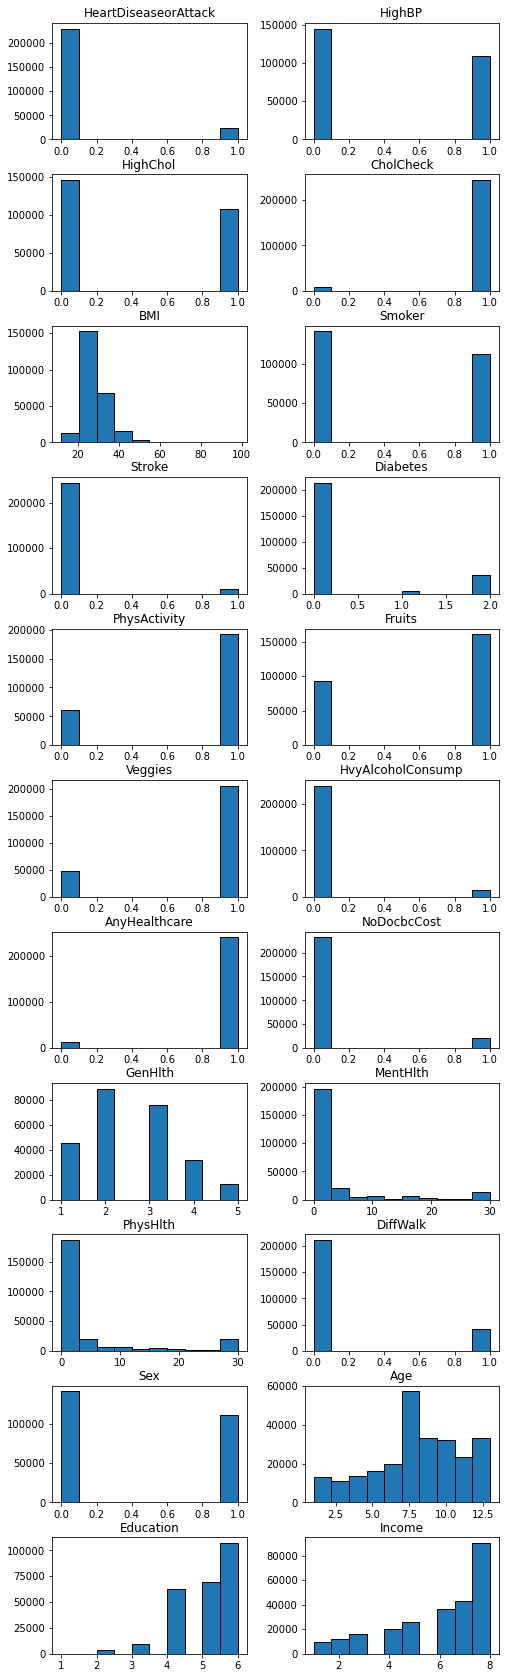

In [11]:
#define number of subplots
fig, axis = plt.subplots(11, 2,  figsize=(8,30))

#create histogram for each column in DataFrame
df.hist(ax=axis, edgecolor='black', grid=False)

In [12]:
# Change data types

# List of columns to convert to categorical
columns_to_convert = ['CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 
                      'MentHlth', 'PhysHlth', 'Education', 'Income']

# Convert specified columns to categorical data type
df[columns_to_convert] = df[columns_to_convert].astype('category')

# Verify the data types of the columns
print(df.dtypes)

HeartDiseaseorAttack       int64
HighBP                     int64
HighChol                   int64
CholCheck               category
BMI                        int64
Smoker                     int64
Stroke                     int64
Diabetes                   int64
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                   int64
Sex                        int64
Age                        int64
Education               category
Income                  category
dtype: object


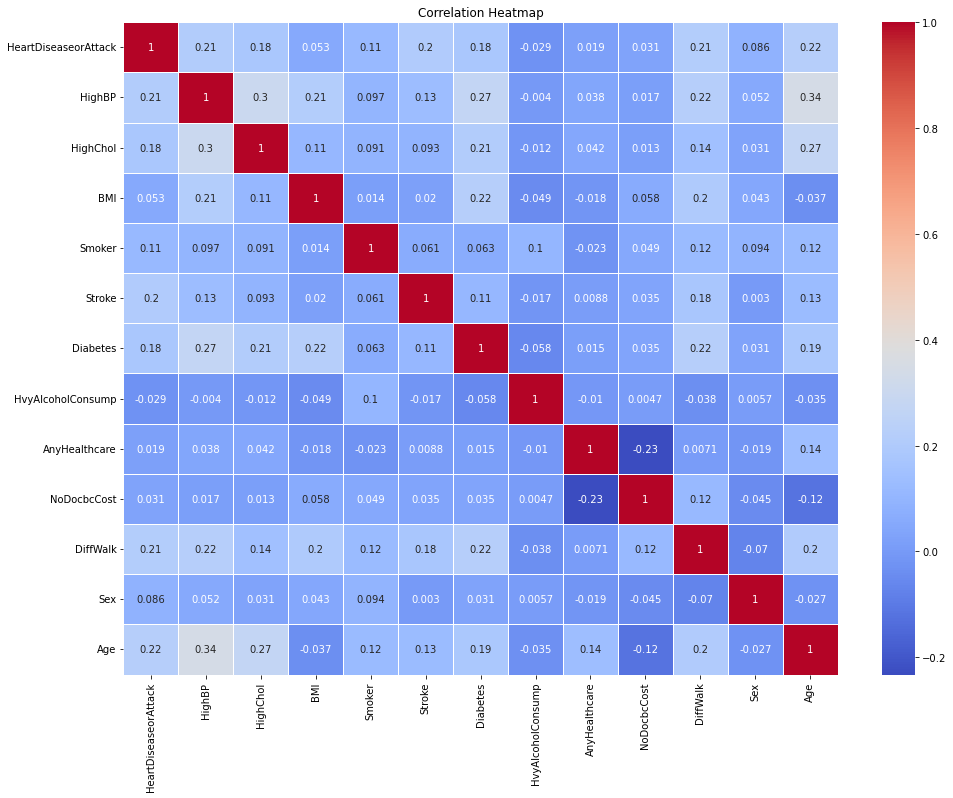

In [13]:
import seaborn as sns

plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# DV and IV

In [14]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std

# from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer, average_precision_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import accuracy_score, roc_curve, log_loss, precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay


In [15]:
# DV: HeartDiseaseorAttack (0, 1)
# IV: the rest of the columns
print(df['HeartDiseaseorAttack'].value_counts())

print(23888/(23888+229773))
print("set scale pos weigth values around: ", 229773/(23888))

0    229773
1     23888
Name: HeartDiseaseorAttack, dtype: int64
0.09417293158979899
set scale pos weigth values around:  9.618762558606832


In [16]:
# Define DV & IV

# cols_to_drop = []
# df_clean = df.drop(columns = cols_to_drop)
df_clean = df.copy()

# Labels / DV
y = df_clean['HeartDiseaseorAttack']
print("Distinct label values: ", y.unique())
y = np.array(y)
X = df_clean.loc[:, df_clean.columns != 'HeartDiseaseorAttack']

# One hot for categorical data: no need in catboost
# X_encoded = pd.get_dummies(X, columns= columns_to_convert)
# Replace True with 1 and False with 0
# X_encoded = X_encoded.replace({True: 1, False: 0})
# X_encoded = X.copy()

# Display the updated DataFrame
# X_encoded.head()

# Label proportion
print(sum(y)/ len(y))
print('Based on above label proportion, the data is not balanced. Need to use stratified when splitting data')


Distinct label values:  [0 1]
0.09417293158979899
Based on above label proportion, the data is not balanced. Need to use stratified when splitting data


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

# checking
print(sum(y_train)/ len(y_train))
print(sum(y_test)/ len(y_test))

print("Test data size from overal data:" , len(y_test)/(len(y_train)+len(y_test)))

0.09417330284632973
0.09417181783776965
Test data size from overal data: 0.2500029567020551


# Initial CatBoost

In [18]:
cat_features = X_train.select_dtypes(include=['category']).columns.tolist()
cat_features

['CholCheck',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Education',
 'Income']

Learning rate set to 0.096873
0:	learn: 0.6541904	total: 127ms	remaining: 2m 6s
1:	learn: 0.6236422	total: 161ms	remaining: 1m 20s
2:	learn: 0.5982772	total: 210ms	remaining: 1m 9s
3:	learn: 0.5772430	total: 261ms	remaining: 1m 4s
4:	learn: 0.5610250	total: 311ms	remaining: 1m 1s
5:	learn: 0.5479959	total: 363ms	remaining: 1m
6:	learn: 0.5375154	total: 407ms	remaining: 57.8s
7:	learn: 0.5281969	total: 458ms	remaining: 56.8s
8:	learn: 0.5209965	total: 507ms	remaining: 55.9s
9:	learn: 0.5154736	total: 558ms	remaining: 55.3s
10:	learn: 0.5100450	total: 608ms	remaining: 54.7s
11:	learn: 0.5053540	total: 663ms	remaining: 54.6s
12:	learn: 0.5016904	total: 718ms	remaining: 54.5s
13:	learn: 0.4985915	total: 765ms	remaining: 53.9s
14:	learn: 0.4957509	total: 815ms	remaining: 53.5s
15:	learn: 0.4930665	total: 868ms	remaining: 53.4s
16:	learn: 0.4911623	total: 920ms	remaining: 53.2s
17:	learn: 0.4892721	total: 964ms	remaining: 52.6s
18:	learn: 0.4877937	total: 1.02s	remaining: 52.5s
19:	learn: 0.

/Users/martawidyastuti/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fpr=[0.         0.         0.         ... 0.99648353 0.99651835 1.        ], tpr=[0.00000000e+00 1.67448091e-04 3.34896182e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


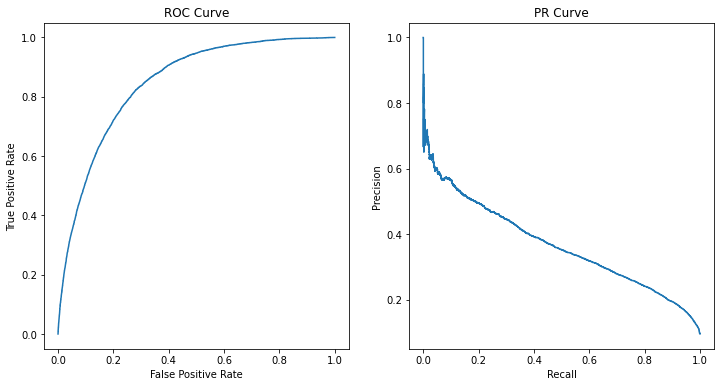

In [19]:
# Base score using default hyperparam of CatBoost

# To force model/prediction to handle imbalance data
scale_pos_weight = len(df[df['HeartDiseaseorAttack']== 0])/ len(df[df['HeartDiseaseorAttack']== 1])

# compile categorical data
cat_features = X_train.select_dtypes(include=['category']).columns.tolist()
model = CatBoostClassifier(cat_features=cat_features
                           , scale_pos_weight= scale_pos_weight
                           )
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
print(np.unique(y_pred))
y_probs = model.predict_proba(X_test)
# y_probs = np.array(y_probs)
score = []
for row in y_probs:
    score.append(row[1])

# evaluate predictions
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: %.2f%%" % (b_accuracy * 100.0))

roc_auc = roc_auc_score(y_test, score)
print("AUC ROC : %.2f%%" % (roc_auc * 100.0))

pr_auc = average_precision_score(y_test, score)
print("AUC PR : %.2f%%" % (pr_auc * 100.0))

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, score)
roc_display = RocCurveDisplay(fpr, tpr)

# PR Curve
prec, recall, _ = precision_recall_curve(y_test, score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Combine into one plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.title.set_text('ROC Curve')
ax2.title.set_text('PR Curve')
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

## Result - Too many FN

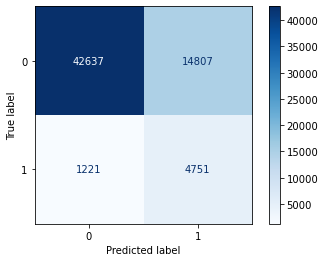

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     57444
           1       0.24      0.80      0.37      5972

    accuracy                           0.75     63416
   macro avg       0.61      0.77      0.61     63416
weighted avg       0.90      0.75      0.80     63416

Log Loss: 0.4756514876008676


In [20]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred))

log_loss_value = log_loss(y_test, y_probs[:,1])
print(f'Log Loss: {log_loss_value}')

# Fine Tuning

## Edit list of categorical variable

In [27]:
# Edit the list of categorical features (based on empirical data, not data description)
cat_features_v2 = ['Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# List of columns to convert to categorical
columns_to_convert_2 = ['CholCheck', 'PhysActivity', 'Fruits', 'Veggies']

# Convert specified columns to categorical data type
df[columns_to_convert_2] = df[columns_to_convert_2].astype('int64')

# Verify the data types of the columns
print(df.dtypes)

# Define DV & IV
# Labels / DV
df_clean = df.copy()
y = df_clean['HeartDiseaseorAttack']
print("Distinct label values: ", y.unique())
y = np.array(y)
X = df_clean.loc[:, df_clean.columns != 'HeartDiseaseorAttack']

# One hot for categorical data: no need in catboost

# Label proportion
print(sum(y)/ len(y))
print('Based on above label proportion, the data is not balanced. Need to use stratified when splitting data')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

# checking
print(sum(y_train)/ len(y_train))
print(sum(y_test)/ len(y_test))

print("Test data size from overal data:" , len(y_test)/(len(y_train)+len(y_test)))


HeartDiseaseorAttack       int64
HighBP                     int64
HighChol                   int64
CholCheck                  int64
BMI                        int64
Smoker                     int64
Stroke                     int64
Diabetes                   int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                   int64
Sex                        int64
Age                        int64
Education               category
Income                  category
dtype: object
Distinct label values:  [0 1]
0.09417293158979899
Based on above label proportion, the data is not balanced. Need to use stratified when splitting data
0.09417330284632973
0.09417181783776965
Test data size from overal data: 0.2500029567020551


Learning rate set to 0.096873
0:	learn: 0.6541703	total: 72.1ms	remaining: 1m 12s
1:	learn: 0.6246361	total: 133ms	remaining: 1m 6s
2:	learn: 0.6006380	total: 178ms	remaining: 59s
3:	learn: 0.5811440	total: 249ms	remaining: 1m 2s
4:	learn: 0.5637548	total: 318ms	remaining: 1m 3s
5:	learn: 0.5513553	total: 376ms	remaining: 1m 2s
6:	learn: 0.5392983	total: 436ms	remaining: 1m 1s
7:	learn: 0.5300600	total: 493ms	remaining: 1m 1s
8:	learn: 0.5221473	total: 557ms	remaining: 1m 1s
9:	learn: 0.5159606	total: 610ms	remaining: 1m
10:	learn: 0.5110811	total: 666ms	remaining: 59.9s
11:	learn: 0.5065759	total: 723ms	remaining: 59.5s
12:	learn: 0.5038709	total: 768ms	remaining: 58.3s
13:	learn: 0.5002936	total: 822ms	remaining: 57.9s
14:	learn: 0.4974141	total: 884ms	remaining: 58.1s
15:	learn: 0.4952163	total: 945ms	remaining: 58.1s
16:	learn: 0.4933362	total: 1s	remaining: 57.8s
17:	learn: 0.4914771	total: 1.04s	remaining: 56.8s
18:	learn: 0.4894510	total: 1.09s	remaining: 56.3s
19:	learn: 0.4879

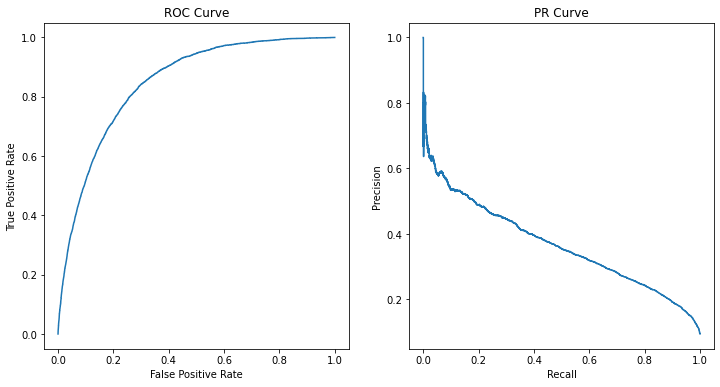

In [28]:
# Base score using default hyperparam of CatBoost

# To force model/prediction to handle imbalance data
# scale_pos_weight = len(df[df['HeartDiseaseorAttack']== 0])/ len(df[df['HeartDiseaseorAttack']== 1])

# compile categorical data
# cat_features = X_train.select_dtypes(include=['category']).columns.tolist()
model = CatBoostClassifier(cat_features=cat_features_v2
                           , scale_pos_weight= scale_pos_weight
                           )
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
print(np.unique(y_pred))
y_probs = model.predict_proba(X_test)
# y_probs = np.array(y_probs)
score = []
for row in y_probs:
    score.append(row[1])

# evaluate predictions
b_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: %.2f%%" % (b_accuracy * 100.0))

roc_auc = roc_auc_score(y_test, score)
print("AUC ROC : %.2f%%" % (roc_auc * 100.0))

pr_auc = average_precision_score(y_test, score)
print("AUC PR : %.2f%%" % (pr_auc * 100.0))

# calculate roc curves
fpr, tpr, _ = roc_curve(y_test, score)
roc_display = RocCurveDisplay(fpr, tpr)

# PR Curve
prec, recall, _ = precision_recall_curve(y_test, score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Combine into one plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.title.set_text('ROC Curve')
ax2.title.set_text('PR Curve')
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

### Result - Too many FN = bad precision

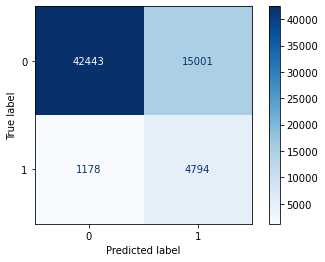

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     57444
           1       0.24      0.80      0.37      5972

    accuracy                           0.74     63416
   macro avg       0.61      0.77      0.61     63416
weighted avg       0.90      0.74      0.80     63416

Log Loss: 0.47679750500650725


In [29]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, y_pred))

log_loss_value = log_loss(y_test, y_probs[:,1])
print(f'Log Loss: {log_loss_value}')

## Use hyperops instead of gridsearch